In [96]:
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import pyaudio
import wave
import time
import sys
import heapq

from scripts.ioaudio import sigToWav

from scripts.graph import qp,darken

from IPython.core.display import display, HTML
import pandas as pd
from scripts.fftgraph import getfft, xfft, detectNMaxFreq,low_pass_index
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
wavefile=wave.open("voice.wav","rb")


In [89]:
wavefile.rewind()
print(wavefile.getframerate())
nframes=wavefile.getnframes()


44100


In [90]:
tbuf=np.frombuffer(wavefile.readframes(nframes),np.int16)
len(buf)

123480

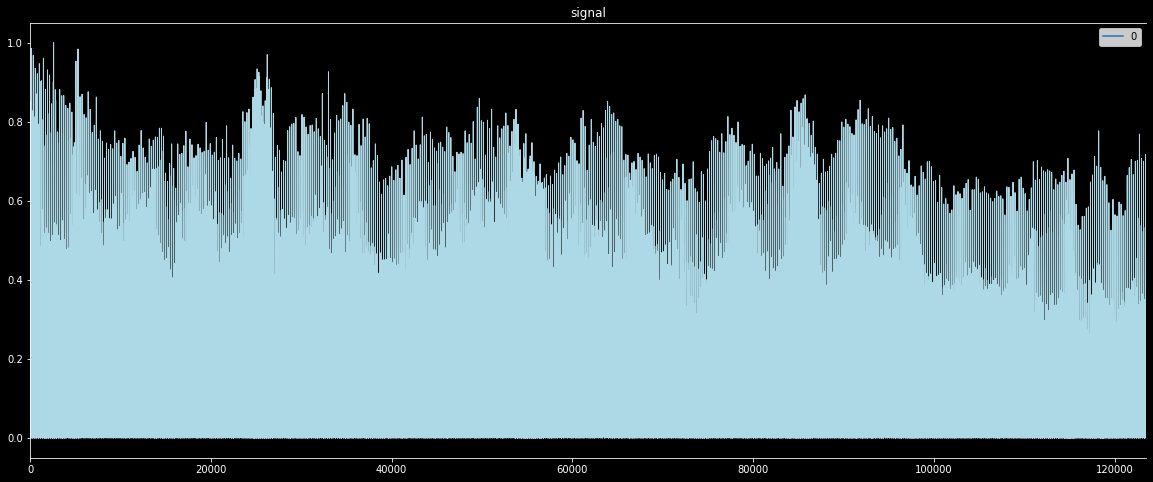

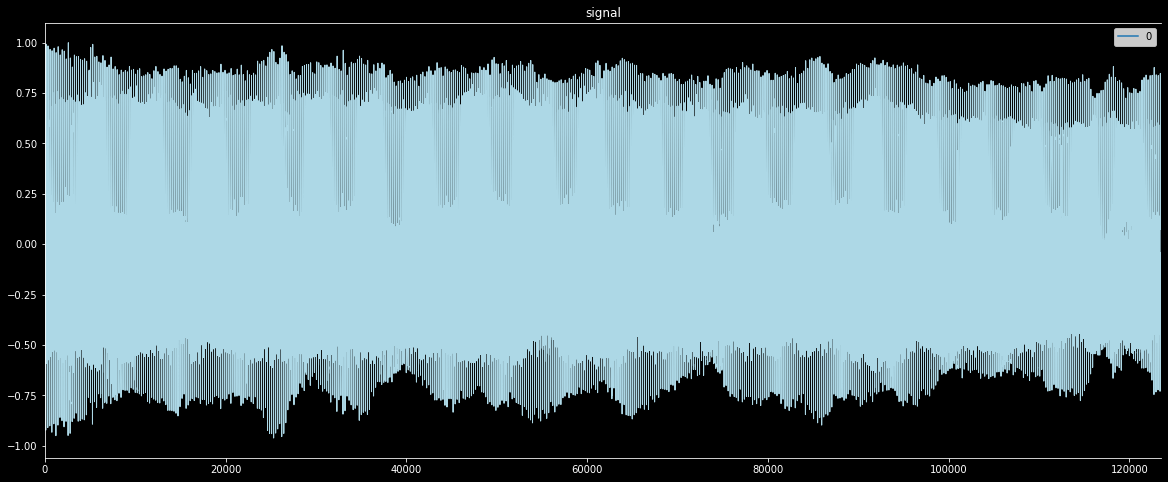

In [106]:
size=len(tbuf)#nsamples
buf=np.array(tbuf-np.mean(tbuf))
buf=buf/max(buf)
bufsq=np.power(buf,2)
darken(qp(bufsq),title="signal")
darken(qp(buf),title="signal")

In [107]:
#get the fft and split the domain so that we don't get high frequency noise

fft=getfft(buf)
fftsq=getfft(bufsq)


xfr=xfft(fft)
xfrsq=xfft(fftsq)
#fftsq=fftsq[0:len(xfrsq)]
#fft=fft[0:len(xfr)]
prodfft=fft*fftsq

corf=np.correlate(fft,fft,"same")
corfsq=np.correlate(fft,fftsq,"same")
corfsq2=np.correlate(prodfft,prodfft,"same")
indx=int((len(corf))/2)
corf=corf[indx:]/max(corf)

xm,ym=detectNMaxFreq(prodfft,1, d=200)
im=heapq.nlargest(10,range(len(ym)),ym.__getitem__)
xm=[xm[i] for i in im]
ym=[ym[i] for i in im]
xm= [xfr[xi] for xi in xm]

[195.71428571428572, 391.42857142857144, 781.4285714285714, 977.1428571428572, 587.1428571428572, 1175.7142857142858, 1368.2142857142858, 1563.9285714285716, 1955.357142857143, 3526.7857142857147]
[141662052.31700176, 32185396.21827415, 12168502.379448513, 9473942.799900709, 8711735.194859475, 5675767.295700565, 347593.1500294408, 291403.4994529259, 54932.254381336876, 39061.45561503528]


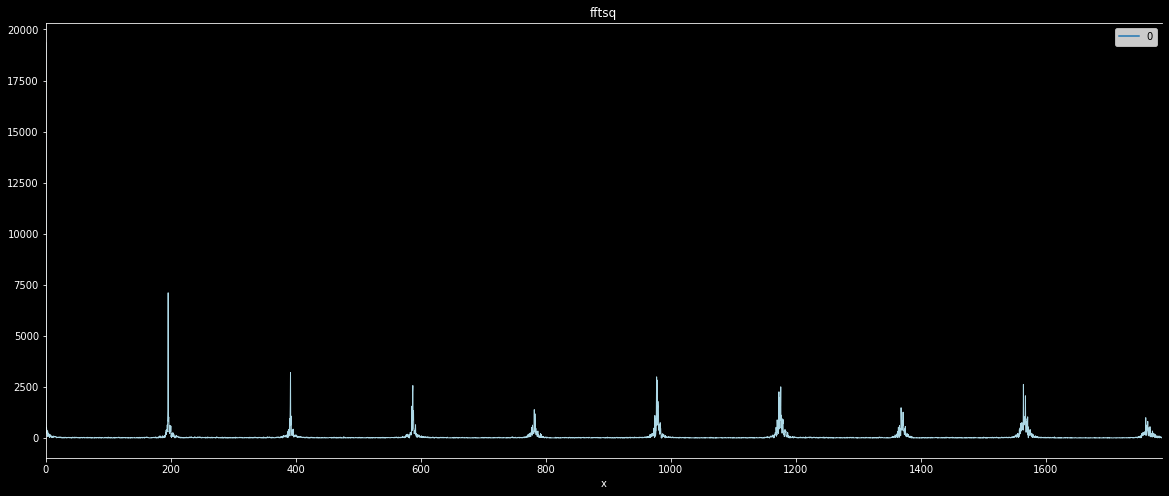

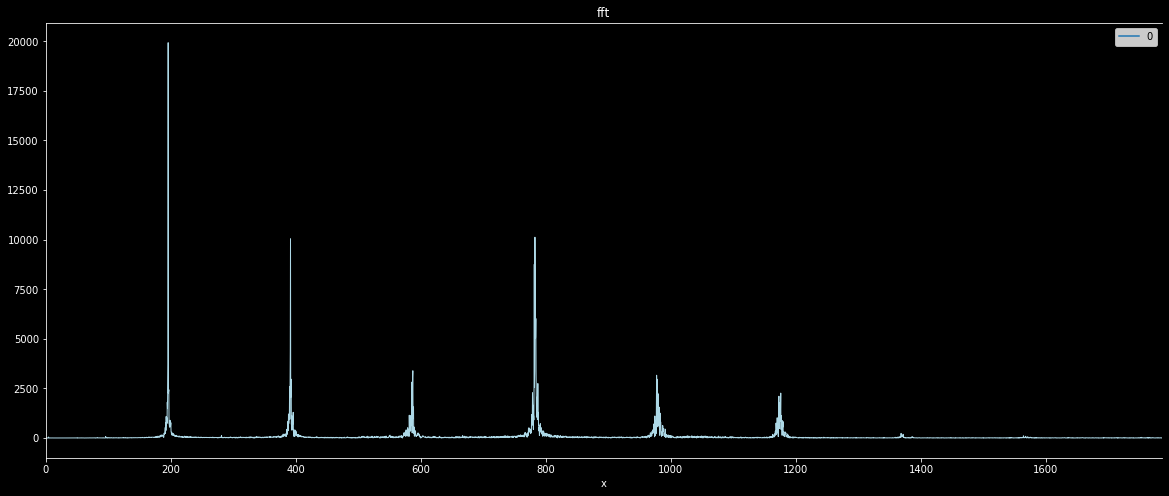

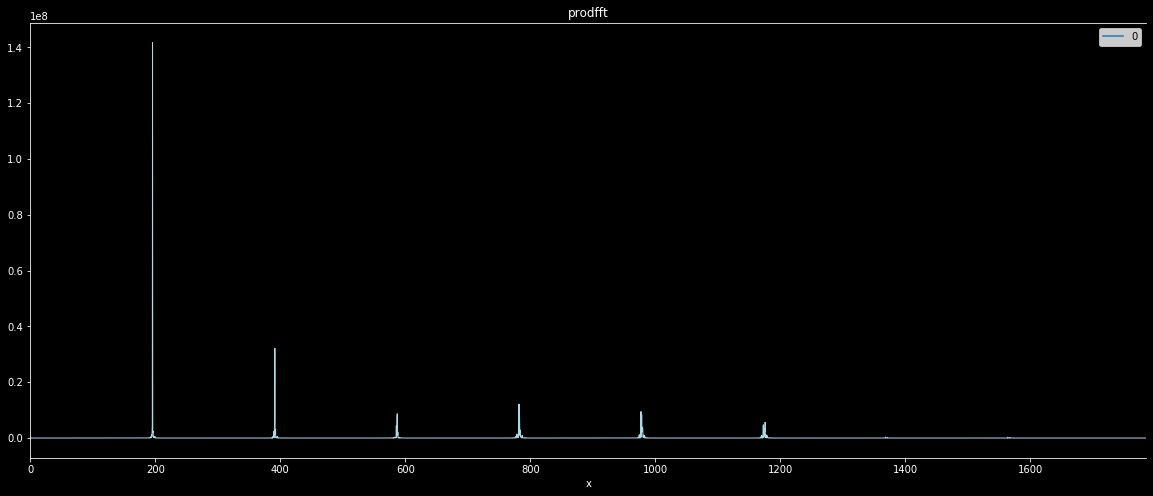

In [108]:
fftsq=fftsq[:len(xfrsq)]
darken(qp(fftsq[:5000],xfrsq[:5000]),title="fftsq")
darken(qp(fft[:5000],xfr[:5000]),title="fft")
darken(qp(prodfft[:5000],xfr[:5000]),title="prodfft")

print(xm)
print(ym)
#darken(qp(corfsq[10000:42000]))
#darken(qp(corfsq2[20000:40000]))
#darken(qp(corf,xfr[:-indx]))

In [35]:

xm,ym=detectNMaxFreq(corf,0, d=30)

im=heapq.nlargest(10,range(len(ym)),ym.__getitem__)
xm=[xm[i] for i in im]
ym=[ym[i] for i in im]
print(xm)
print(ym)



[548, 3, 1096, 1643, 2188, 580, 2744, 39, 1066, 1128]
[0.5647736721755818, 0.5413008612478619, 0.41118587108622384, 0.3564573073025604, 0.14012397693212147, 0.07963865889159517, 0.07580175675677117, 0.07557996031883442, 0.06938669530259109, 0.0609745260662618]


In [62]:
xm = [xfr[xi] for xi in xm]
xm, ym = zip(*sorted(zip(xm, ym)))
xm=np.array(xm)
ym=np.array(ym)
np.set_printoptions(precision=2)
print(xm)
print(ym)

IndexError: list index out of range

In [31]:
[195.71*(n+1) for n in range(10)]

[195.71,
 391.42,
 587.13,
 782.84,
 978.5500000000001,
 1174.26,
 1369.97,
 1565.68,
 1761.39,
 1957.1000000000001]